# Data Generation with a Deep Convolutional Generative Adversarial Network (DCGAN)

* The purpose of this notebook is to explore the possibility of using synthetic image generators to create additional COVID-19 images that could be used to balance the classes in our training data.
* The implemented GAN design follows certain recommendations by the original DCGAN publication (https://arxiv.org/abs/1511.06434).

*Author: Dominik Chodounský, FIT CTU in Prague (Last edit: 05/11/21)*

## Library Imports

In [3]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import time
import numpy as np
import random
import os
import sys

## Constants and Settings
* Set variable *ROOT_DIR* to contain path to root *BI-BAP* folder.
* Set variable *TRAIN_DIR* to contain the path to the training data folder (default values are meant for training on the COVIDx8B positive class data).
* Set variable *SAVE_DIR* to contain the path to *BI-BAP/models/GAN* folder, where trained models are saved.
* You may change the default parameters for the optimization as well, their description is provided in the following cell.

In [4]:
ROOT_PATH = '../'
TRAIN_DIR = os.path.join(ROOT_PATH, 'data/COVIDx8B/train/positive')
SAVE_DIR = os.path.join(ROOT_PATH, 'models/GAN')

IMG_SIZE = 128   # target width and height of generated images
BATCH_SIZE = 8   # size of generated batches of images
CHANNEL_CNT = 3  # number of channels in images (3 = RGB, 1 = Grayscale)
EPOCH_CNT = 200  # number of epochs to use in training
RAND_SEED = 111  # random seed for reproducibility

# ------------------------------------------------------------------------------------------------------------------------#
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)
random.seed(RAND_SEED)
os.environ['PYTHONHASHSEED'] = str(RAND_SEED)

warnings.filterwarnings("ignore")

## File Imports

* Import file containing the definitions of the generator and the discriminator along with the training functions.

In [5]:
from model_architectures.gan_models import *

## DCGAN Training

* Create a list of all training images that are then passed on to the trainer.

In [6]:
covid_data = np.asarray(os.listdir(TRAIN_DIR))

* Build discriminator and generator and combine them into a DCGAN model.


In [7]:
discriminator = build_discriminator(IMG_SIZE, CHANNEL_CNT)
generator = build_generator(IMG_SIZE, CHANNEL_CNT)

gan = build_gan(generator, discriminator)

In [8]:
discriminator.summary()
generator.summary()
gan.summary()

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     9728      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       409728    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       409728    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)     

* Train the DCGAN model and show regular progress of the generated synthetic images.

In [ ]:
train(generator, discriminator, gan, TRAIN_DIR, covid_data, IMG_SIZE, 0, EPOCH_CNT, BATCH_SIZE, os.path.join(SAVE_DIR, f'dcgan-{IMG_SIZE}'))

Output hidden; open in https://colab.research.google.com to view.

## Continue Training a Pre-trained Model

In [ ]:
saved_gan = tf.keras.models.load_model(
    os.path.join(SAVE_DIR, 'dcgan-128-epoch_140.h5'), custom_objects=None, compile=True, options=None
)

In [ ]:
saved_gan.layers[0].compile(
        loss='binary_crossentropy', 
        optimizer=Adam(lr=0.0002, beta_1=0.5))
saved_gan.layers[1].compile(
        loss='binary_crossentropy', 
        optimizer=Adam(lr=0.0002, beta_1=0.5))

In [ ]:
start_from_epoch = 140
train(saved_gan.layers[0], saved_gan.layers[1], saved_gan, TRAIN_DIR, covid_data, IMG_SIZE, start_from_epoch, EPOCH_CNT, BATCH_SIZE, os.path.join(SAVE_DIR, f'dcgan-{IMG_SIZE}'))

## Generate Samples

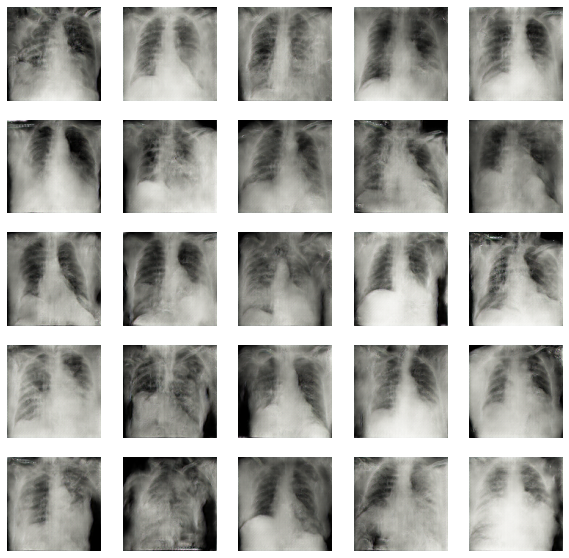

In [ ]:
show_generated(generate_fake_samples(saved_gan.layers[0], 30)[0])